<a href="https://colab.research.google.com/github/lucaspsilveira/ProcessamentoDigitalDeImagens/blob/master/Atividade_Pr%C3%A1tica_II_Processamento_digital_de_Imagens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade Prática II
## Nome: Lucas Pacheco Silveira

Para os algoritmos de visualização das imagens é necessário realizar a importação da imagem da Lena disponibilizada no moodle.

# Importação de Bibliotecas

In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Implementações DFTs



In [0]:
## DFT LENTA
def dft_lenta(x):
    x = np.asarray(x, dtype=float)
    #print("x: \n ", x)
    N = x.shape[0]
    #print("N: \n", N)
    n = np.arange(N)
    #print("n arrange: \n", n)
    k = n.reshape((N, 1))
    #print("K: \n", k)
    M = np.exp(-2j * np.pi * k * n / N)
    #print("M: \n", M)
    return np.dot(M, x)

In [0]:
## DFT 2 d
def dft2d_aula(f):
    m, n = f.shape
    g = np.zeros((m,n))
    for u in range(0, m):
        for v in range(0, n):
            for x in range(0, m):
                for y in range(0, n):
                    g[u,v] = g[u,v] + f[x,y]*np.exp((-1j*2*np.pi)*(((u*x)/m)+((v*y)/n)))       
    return g.round().astype('int64')


def dft2_lenta(x):
  return np.transpose(dft_lenta(np.transpose(dft_lenta(x)))).round().astype('int64')


## Validações DFTs


In [7]:
x = np.array([[1,2,3,4,5,12,12,11, 90], 
              [6,7,8,9,10,13,12,11, 90]])

print("DFT2 lenta \n", dft2_lenta(x))
print("FFT2 python \n", np.fft.fft2(x).round().astype('int64'))
print("\n\nSão iguais? : ", np.allclose(dft2_lenta(x),np.fft.fft2(x).round().astype('int64')))



DFT2 lenta 
 [[ 306  101   21  -87 -157 -157  -87   21  101]
 [ -26   -2   -3   -2   -3   -3   -2   -3   -2]]
FFT2 python 
 [[ 306  101   21  -87 -157 -157  -87   21  101]
 [ -26   -2   -3   -2   -3   -3   -2   -3   -2]]


São iguais? :  True


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: ComplexWarning: Casting complex values to real discards the imaginary part
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  


# Demonstração FFT2 Python



Espectro de fourier utilizando função FFT2 do python


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


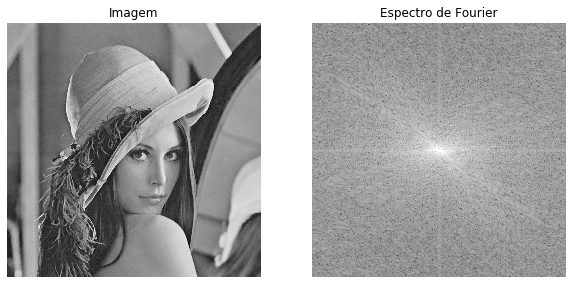

In [9]:
img = cv2.imread('lena.jpg', cv2.IMREAD_GRAYSCALE)
f = np.fft.fft2(img)
#f = dft2d(img)
fshift = np.fft.fftshift(f)
mag = 20*np.log(np.abs(fshift))

print("Espectro de fourier utilizando função FFT2 do python")

plt.figure(figsize=((10,10)))
plt.subplot(1,2,1)
plt.axis('off')
plt.title('Imagem')
plt.imshow(img, cmap='gray',vmin=0, vmax=255)

plt.subplot(1,2,2)
plt.axis('off')
plt.title('Espectro de Fourier')
plt.imshow(mag, cmap='gray', vmin=0, vmax=255)

plt.subplot(1,2,2)
plt.axis('off')
plt.title('Espectro de Fourier')
plt.imshow(mag, cmap='gray', vmin=0, vmax=255)

# IMPLEMENTAÇÃO DA FFT2D



In [0]:
def fft(x):
    N = x.shape[0]
    if N <= 1: return x
    par = fft(x[0::2])
    impar =  fft(x[1::2])
    T= [np.exp(-2j*np.pi*k/N)*impar[k] for k in range(N//2)]
    #print(N/2)
    #print("T: tamanho: {}, o T: {} \n".format(np.array(T).shape, T))
    return [par[k] + T[k] for k in range(N//2)] + [par[k] - T[k] for k in range(N//2)]
 
def fft2(x):
  return np.transpose(fft(np.transpose(fft(x))))

## Validação da FFT2 com Vetores


In [17]:
x = np.array(np.random.rand(2,512))

print("FFT2 implementação \n", fft2(x).round().astype('int64'))
print("FFT2 python \n", np.fft.fft2(x).round().astype('int64'))
print("\n\nSão iguais? : ", np.allclose(fft2(x),np.fft.fft2(x)))

FFT2 implementação 
 [[509  -8   1 ...   5   1  -8]
 [ -6   9   3 ...   0   3   9]]
FFT2 python 
 [[509  -8   1 ...   5   1  -8]
 [ -6   9   3 ...   0   3   9]]


São iguais? :  True


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  after removing the cwd from sys.path.


# Validação da FFT2 com imagens

Transformada pela função do Numpy: /n [[ 8.13213900e+06     +0.j         -1.19904348e+05+596754.06702984j
   3.92399463e+05-274776.91050985j ... -6.20465339e+04-156415.9554435j
   3.92399463e+05+274776.91050985j -1.19904348e+05-596754.06702984j]
 [-6.48248340e+03-304138.80041483j -4.10521372e+05+388938.80453392j
  -2.78689949e+05 +10609.37080135j ...  1.65233422e+05+201496.68804875j
  -8.98164360e+04+114469.36848447j  5.84388283e+03+238459.2068381j ]
 [-1.13393243e+05 -42827.79524118j -6.76576395e+04 -35012.03320413j
   1.71358592e+05-107627.71992516j ...  8.90433261e+04+231763.82616519j
  -1.82165273e+05 -44272.6510317j   2.01719705e+05 -13916.52712284j]
 ...
 [ 1.25050123e+05 -60069.82884076j  1.88218303e+05+172818.69142073j
  -1.30820813e+05 -50719.93745993j ...  2.49727233e+05  +9772.52163223j
   2.28030221e+04-171525.65835645j -7.37734836e+03+149288.90864551j]
 [-1.13393243e+05 +42827.79524118j  2.01719705e+05 +13916.52712284j
  -1.82165273e+05 +44272.6510317j  ... -1.42067284e+05

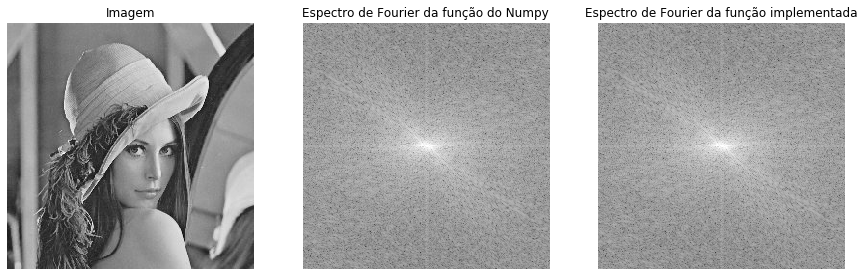

In [18]:
img = cv2.imread('lena.jpg', cv2.IMREAD_GRAYSCALE)

f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
mag = 20*np.log(np.abs(fshift))

f2 = fft2(img)

fshift2 = np.fft.fftshift(f2)
mag2 = 20*np.log(np.abs(fshift2))
print("Transformada pela função do Numpy: /n", f)
print("Transformada pela função implementada: /n", f2)

print("São iguais (validada pela função allclose() no numpy)? ", np.allclose(f, f2))

plt.figure(figsize=((15,15)))
plt.subplot(1,3,1)
plt.axis('off')
plt.title('Imagem')
plt.imshow(img, cmap='gray',vmin=0, vmax=255)

plt.subplot(1,3,2)
plt.axis('off')
plt.title('Espectro de Fourier da função do Numpy')
plt.imshow(mag, cmap='gray', vmin=0, vmax=255)

plt.subplot(1,3,3)
plt.axis('off')
plt.title('Espectro de Fourier da função implementada')

plt.imshow(mag2, cmap='gray', vmin=0, vmax=255)

## Reconstrução das imagens através da inversa de fourier da função FFT2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: ComplexWarning: Casting complex values to real discards the imaginary part
  app.launch_new_instance()


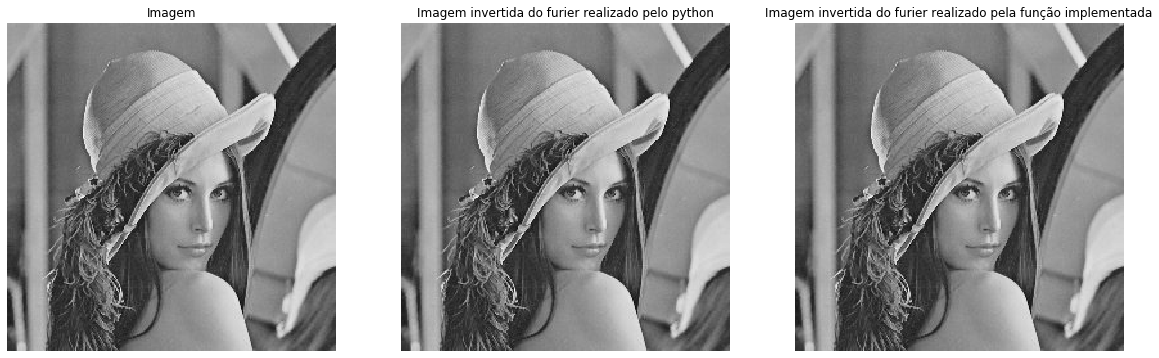

In [19]:
plt.figure(figsize=((20,20)))
plt.subplot(1,3,1)
plt.axis('off')
plt.title('Imagem')
plt.imshow(img, cmap='gray',vmin=0, vmax=255)

plt.subplot(1,3,2)
plt.axis('off')
plt.title('Imagem invertida do furier realizado pelo python')
plt.imshow(np.fft.ifft2(f).round().astype('int64'), cmap='gray', vmin=0, vmax=255)

plt.subplot(1,3,3)
plt.axis('off')
plt.title('Imagem invertida do furier realizado pela função implementada')

plt.imshow(np.fft.ifft2(f2).round().astype('int64'), cmap='gray', vmin=0, vmax=255)

Podemos ver que a função implementada atende nossas necessidades de aplicar a tranformada de fourier nos dois planos. A função pode ser comprovado visualizando os valores brutos de valores dentro de uma matriz, assim como a visualização da imagem do seu espectro. Também foi utilizado o método allclose() do numpy para garantir que as duas possuem valores iguais. As referências utilizadas para implementar os códigos pode ser obtida na próxima seção.

# Referências


*   [Documentação Numpy](https://docs.scipy.org/doc/numpy/reference/routines.fft.html)
*   [Understanding the FFT algorithm](https://jakevdp.github.io/blog/2013/08/28/understanding-the-fft/)
*   [Frequency and the Fast Fourier Transform](https://www.oreilly.com/library/view/elegant-scipy/9781491922927/ch04.html)
[Fourier Transform](https://rosettacode.org/wiki/Fast_Fourier_transform)
*   [Fourier Transform, Fourier Series, and frequency spectrum](https://www.youtube.com/watch?v=r18Gi8lSkfM)
*   [But what is the Fourier Transform? A visual introduction.](https://www.youtube.com/watch?v=spUNpyF58BY)


